In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2
from HelperFunctions import label_encode_column, columns_of_type
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [2]:
#df = pd.read_csv('down_sampled_df_v2.csv')

#### Read Default dataset to train regression on default population

In [4]:
df = pd.read_csv('Sampled Dataset_Default.csv.gz', compression='gzip', low_memory=True)

In [5]:
dfHO = pd.read_csv('Holdout Dataset.csv.gz', compression='gzip', low_memory=True)

In [69]:
cols = list(df.columns)

In [70]:
cols

['acc_now_delinq',
 'addr_state',
 'all_util',
 'annual_inc',
 'application_type',
 'chargeoff_within_12_mths',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'delinq_amnt',
 'dti',
 'emp_length',
 'funded_amnt',
 'grade',
 'home_ownership',
 'il_util',
 'initial_list_status',
 'inq_last_12m',
 'int_rate',
 'mo_sin_rcnt_tl',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'num_accts_ever_120_pd',
 'num_rev_accts',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'open_acc',
 'num_il_tl',
 'pct_tl_nvr_dlq',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'revol_util',
 'sub_grade',
 'tax_liens',
 'term',
 'tot_coll_amt',
 'tot_cur_bal',
 'tot_hi_cred_lim',
 'total_acc',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'total_rev_hi_lim',
 'verification_status',
 'fico_score',
 'active_rev_acct_frac',
 'active_ins_acct_frac',
 'duration',
 'credit_hist',
 'treasury_rate',
 'unemp_rate_3mon']

In [150]:
dfHO.head()

,acc_now_delinq,addr_state,all_util,annual_inc,application_type,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,...,loan_status,fico_score,active_rev_acct_frac,active_ins_acct_frac,total_payout,duration,return_rate,credit_hist,treasury_rate,unemp_rate_3mon
0,0.0,NY,54.0,65000.0,Individual,0.0,0.0,0.0,0.0,24.89,...,Fully Paid,697.0,0.333333,0.5,15901.83,0.587443,0.104493,9.756164,1.59,5.10
1,0.0,TX,-999.0,50000.0,Individual,0.0,0.0,0.0,0.0,27.29,...,Fully Paid,702.0,0.538462,-999.0,18186.92,2.924429,0.068095,33.021918,0.87,4.23
2,0.0,VA,-999.0,70000.0,Individual,0.0,0.0,0.0,0.0,17.28,...,Fully Paid,737.0,0.241379,-999.0,13173.93,1.666895,0.073775,23.183562,1.37,4.87
3,0.0,GA,-999.0,80000.0,Individual,0.0,0.0,0.0,0.0,29.06,...,Fully Paid,682.0,0.461538,-999.0,47165.73,4.751826,0.129892,12.008219,1.52,8.63
4,0.0,NY,29.0,63000.0,Individual,0.0,0.0,0.0,0.0,9.47,...,Fully Paid,792.0,0.083333,0.5,4924.90,0.584703,0.044913,13.175342,2.65,3.93


In [6]:
df.drop(['issue_d','return_rate','total_payout','loan_status'],axis = 1, inplace = True)

In [71]:
df.term.unique()

array([36, 60], dtype=int64)

##### Filter for 36 month and 60 month

In [7]:
dfTS = df[df['term'] == 36].copy()

In [8]:
dfSixty = df[df['term'] == 60].copy()

In [ ]:
dfSixty.reset_index(inplace = True)
dfTS.reset_index(inplace = True)

In [12]:
dfSixty.drop(['index'],axis=1,inplace = True)

In [13]:
dfTS.drop(['index'],axis=1,inplace=True)

In [14]:
dfTS.head()

,acc_now_delinq,addr_state,all_util,annual_inc,application_type,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,...,total_il_high_credit_limit,total_rev_hi_lim,verification_status,fico_score,active_rev_acct_frac,active_ins_acct_frac,duration,credit_hist,treasury_rate,unemp_rate_3mon
0,0.0,MO,-999.0,45600.0,Individual,0.0,0.0,1.0,0.0,3.26,...,-999.0,-999.0,Not Verified,687.0,-999.0,-999.0,2.086073,17.926027,4.01,5.20
1,0.0,FL,-999.0,43500.0,Individual,0.0,0.0,0.0,0.0,3.01,...,-999.0,-999.0,Not Verified,647.0,-999.0,-999.0,2.918950,3.501370,4.01,4.47
2,0.0,WA,-999.0,120000.0,Individual,0.0,0.0,0.0,0.0,16.97,...,-999.0,-999.0,Not Verified,697.0,-999.0,-999.0,4.168265,26.520548,3.35,4.37
3,0.0,NC,-999.0,76500.0,Individual,0.0,0.0,0.0,0.0,9.98,...,-999.0,-999.0,Not Verified,642.0,-999.0,-999.0,1.666895,12.926027,3.35,4.53
4,0.0,FL,-999.0,36500.0,Individual,0.0,0.0,0.0,0.0,19.46,...,-999.0,-999.0,Not Verified,727.0,-999.0,-999.0,0.666895,12.257534,3.13,4.50


##### Filter for defaulted loans only

In [4]:
#df['loan_status'].unique()

array(['Fully Paid', 'Default'], dtype=object)

In [5]:
#dfDefault = df[df['loan_status'] == 'Default'].reset_index()

In [6]:
#dfTS = dfDefault[dfDefault['term'] == 36].reset_index()

In [7]:
#dfS = dfDefault[dfDefault['term']==60].reset_index()

In [11]:
#dfS.drop(['index'],axis=1,inplace=True)

In [12]:
#dfTS.drop(['index'],axis=1,inplace=True)

#### Set up the target variable for 36 month loan dataframe = dfTS

In [81]:
#dfTS.drop(['return_rate'],axis = 1,inplace = True)

In [14]:
#dfTS.drop(['loan_status'],axis=1,inplace = True)

In [15]:
#dfTS.drop(['issue_d'],axis=1,inplace=True)

###### Duration is in terms of years, converted to months * multiplying by 12

In [15]:
#36 month
dfTS['duration'] = dfTS['duration']* 12

In [16]:
#60 month 
dfSixty['duration'] = dfSixty['duration']* 12

In [77]:
df['duration'] = df['duration']* 12

In [17]:
cat_list = columns_of_type(dfTS,'string')

In [18]:
cat_list2 = columns_of_type(dfSixty,'string')

In [78]:
#combine model cat_list
cat_list3 = columns_of_type(df,'string')

In [19]:
dfTS_LE = label_encode_column(dfTS, cat_list)

In [20]:
dfSixty_LE = label_encode_column(dfSixty, cat_list2)

In [79]:
df_LE = label_encode_column(df, cat_list3)

In [32]:
dfTS_LE.head()

,acc_now_delinq,all_util,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,emp_length,funded_amnt,...,treasury_rate,unemp_rate_3mon,addr_state,application_type,grade,home_ownership,initial_list_status,purpose,sub_grade,verification_status
0,0.0,-999.0,45600.0,0.0,0.0,1.0,0.0,3.26,10,4650.0,...,4.01,5.20,24,0,2,1,0,9,10,0
1,0.0,-999.0,43500.0,0.0,0.0,0.0,0.0,3.01,4,4900.0,...,4.01,4.47,9,0,4,5,0,2,21,0
2,0.0,-999.0,120000.0,0.0,0.0,0.0,0.0,16.97,7,15450.0,...,3.35,4.37,47,0,2,5,0,2,12,0
3,0.0,-999.0,76500.0,0.0,0.0,0.0,0.0,9.98,5,10475.0,...,3.35,4.53,27,0,4,4,0,1,23,0
4,0.0,-999.0,36500.0,0.0,0.0,0.0,0.0,19.46,1,10000.0,...,3.13,4.50,9,0,1,1,0,8,7,0


In [22]:
# 36 month term x and y datasets
x = dfTS_LE.loc[:, dfTS_LE.columns != 'duration'].copy()
y = dfTS_LE['duration'].reset_index(drop=True)

In [126]:
#y = dfTS_LE['duration'].reset_index(drop=True)

In [23]:
# sixty month term x and y datasets
x2 = dfSixty_LE.loc[:, dfSixty_LE.columns != 'duration'].copy()
y2 = dfSixty_LE['duration'].reset_index(drop=True)

In [80]:
#combined
x3 = df_LE.loc[:, df_LE.columns != 'duration'].copy()
y3 = df_LE['duration'].reset_index(drop=True)

#### Run Random Forest Regression to estimate Expected Months to default

In [24]:
rf = RandomForestRegressor(n_estimators = 75, random_state = 42)

In [25]:
# 36 month term
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [26]:
#60 month term
x_tr, x_te, y_tr, y_te = train_test_split(x2, y2, test_size = 0.25, random_state = 42)

In [81]:
#comebined test train
x_trCom, x_teCom, y_trCom, y_teCom = train_test_split(x3, y3, test_size = 0.25, random_state = 42)

#### 36 month test and train dataset shape

In [27]:
print('X train Shape:', x_train.shape)
print('y train Shape:', y_train.shape)
print('x test Shape:', x_test.shape)
print('y test Shape:', y_test.shape)

X train Shape: (35166, 50)
y train Shape: (35166,)
x test Shape: (11723, 50)
y test Shape: (11723,)


#### 60 month test and train dataset shape

In [28]:
print('X train Shape:', x_tr.shape)
print('y train Shape:', y_tr.shape)
print('x test Shape:', x_te.shape)
print('y test Shape:', y_te.shape)

X train Shape: (14668, 50)
y train Shape: (14668,)
x test Shape: (4890, 50)
y test Shape: (4890,)


#### Combined month test and train dataset shape


In [82]:
print('X train Shape:', x_trCom.shape)
print('y train Shape:', y_trCom.shape)
print('x test Shape:', x_teCom.shape)
print('y test Shape:', y_teCom.shape)

X train Shape: (49835, 50)
y train Shape: (49835,)
x test Shape: (16612, 50)
y test Shape: (16612,)


In [29]:
model = rf.fit(x_train, y_train)#.loan_duration.ravel()

In [30]:
# model fit for the 60 month term data frame
model60 = rf.fit(x_tr, y_tr)

In [83]:
# fit modeled for combined terms
modCom = rf.fit(x_trCom,y_trCom)

In [85]:
print("The train set R^2 is: %.5f" % model.score(x_train, y_train))
print("The test set R^2 is is: %.5f" % model.score(x_test, y_test))

The train set R^2 is: 0.70650
The test set R^2 is is: 0.70655


In [35]:
print("The train set R^2 is: %.5f" % model60.score(x_tr, y_tr))
print("The test set R^2 is is: %.5f" % model60.score(x_te, y_te))

The train set R^2 is: 0.88675
The test set R^2 is is: 0.18072


In [84]:
print("The train set R^2 is: %.5f" % modCom.score(x_trCom, y_trCom))
print("The test set R^2 is is: %.5f" % modCom.score(x_teCom, y_teCom))

The train set R^2 is: 0.88582
The test set R^2 is is: 0.19055


In [36]:
kfo = KFold(n_splits=5,shuffle = True, random_state = 32)

In [37]:
# set parameter grid for kfold cross validation kfold is set above to 5
param_grid ={'max_depth': [20, 25, 30],
             'max_features': ['auto','sqrt','log2'],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[1, 3, 5],
             'n_estimators': [25, 50, 75, 100, 150]}

In [142]:
grid_search_rforest = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', 
                                     cv= kfo, n_jobs=-1, return_train_score = True)

In [38]:
gs_rf_60 = GridSearchCV(model60, param_grid, scoring='neg_mean_squared_error', 
                                     cv= kfo, n_jobs=-1, return_train_score = True)

In [145]:
%time grid_search_rforest.fit(x_train, y_train) 

Wall time: 2h 43min 25s


GridSearchCV(cv=KFold(n_splits=5, random_state=32, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=75, n_j...one,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
      

In [39]:
%time gs_rf_60.fit(x_tr, y_tr) 

Wall time: 1h 54s


GridSearchCV(cv=KFold(n_splits=5, random_state=32, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=75, n_j...one,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
      

In [86]:
gs_rf_Com = GridSearchCV(modCom, param_grid, scoring='neg_mean_squared_error', 
                                     cv= kfo, n_jobs=-1, return_train_score = True)

In [87]:
%time gs_rf_Com.fit(x_trCom, y_trCom) 

Wall time: 4h 24min 24s


GridSearchCV(cv=KFold(n_splits=5, random_state=32, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=75, n_j...one,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
      

In [146]:
# get the best parameters
grid_search_rforest.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 150}

In [40]:
gs_rf_60.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 150}

In [89]:
gs_rf_Com.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 150}

In [147]:
# Prediction using the tuned parameters
grid_rforest = grid_search_rforest.best_estimator_

In [41]:
grf60 = gs_rf_60.best_estimator_

In [88]:
grfCom = gs_rf_Com.best_estimator_

In [148]:
#36 month term
print("The train set R^2 is: %.5f" % grid_rforest.score(x_train, y_train))
print("The test set R^2 is is: %.5f" % grid_rforest.score(x_test, y_test))

The train set R^2 is: 0.62876
The test set R^2 is is: 0.17307


In [93]:
#60 month term
print("The train set R^2 is: %.5f" % grf60.score(x_tr, y_tr))
print("The test set R^2 is is: %.5f" % grf60.score(x_te, y_te))

The train set R^2 is: 0.70697
The test set R^2 is is: 0.19397


In [92]:
#Combined
print("The train set R^2 is: %.5f" % gs_rf_Com.score(x_trCom, y_trCom))
print("The test set R^2 is is: %.5f" % gs_rf_Com.score(x_teCom, y_teCom))

#print("The train set R^2 is: %.5f" % modCom.score(x_trCom, y_trCom))
#print("The test set R^2 is is: %.5f" % modCom.score(x_teCom, y_teCom))

The train set R^2 is: -43.13137
The test set R^2 is is: -76.57042


In [119]:
def printErrors(Yt, predMod):
    """
    This function takes the following inputs:
    1. Yt = the trained predicted values
    2. predMod = the prediction from the fitted model
    It thens prints the errors for the model ie MAE, MSE, RMSLE
    """
    errors = abs(predMod - Yt)
    print('Mean Absolute Error (MAE):', round(np.mean(errors), 2))
    print('Mean Squared Error (MSE):', mean_squared_error(Yt, predMod))
    print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(Yt, predMod)))
    print('Root Mean Square Log Error (RMSLE):', np.sqrt(mean_squared_log_error(Yt, predMod)))
    mape = 100 * (errors / Yt)
    print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [45]:
grid_pred = gs_rf_60.predict(x_te)

In [94]:
grid_pred_com = gs_rf_Com.predict(x_teCom)

In [107]:
#complete predict model performed better
complete_Model_base = modCom.predict(x_teCom)

In [120]:
printErrors(y_te, grid_pred)

Mean Absolute Error (MAE): 8.47
Mean Squared Error (MSE): 114.61933147830199
Root Mean Square Error (RMSE): 10.70604182124757
Root Mean Square Log Error (RMSLE): 0.5813289258136936
Mean Absolute Percent Error (MAPE): 72.83 %.


In [121]:
printErrors(y_teCom, grid_pred_com)

Mean Absolute Error (MAE): 6.99
Mean Squared Error (MSE): 76.57042169580424
Root Mean Square Error (RMSE): 8.750452656623212
Root Mean Square Log Error (RMSLE): 0.5413958446382245
Mean Absolute Percent Error (MAPE): 66.43 %.


In [122]:
printErrors(y_teCom, complete_Model_base)

Mean Absolute Error (MAE): 7.01
Mean Squared Error (MSE): 77.54389773958907
Root Mean Square Error (RMSE): 8.80590130194457
Root Mean Square Log Error (RMSLE): 0.5408150769873059
Mean Absolute Percent Error (MAPE): 65.93 %.


In [113]:
def printMod(Xtr,Xte,Ytr, Yte, modSel, modName):
    """
    This function takes the following inputs:
    1. Xtr,Xte,Ytr,Yte = X train data set, X test data set, Y train array, Y test array
    2. modSel is the fitted model
    3. modName is the model name used for plotting i.e. OLS, Lasso, Random Forest
    It then creates a plot for test vs train predicted prices
    """
    y_train_eNet = modSel.predict(Xtr)
    y_test_eNet = modSel.predict(Xte)
    # Plot predictions
    plt.figure(figsize=(12,8))
    plt.scatter(y_train_eNet,Ytr, c='black', marker="o", s=15, label = "Training data")
    plt.scatter(y_test_eNet, Yte, c='orange', marker='o', s=15, label = "Test data")
    plt.title(modName + " Model Train vs Test", fontsize = 20)
    plt.xlabel("Predicted Months", fontsize = 16)
    plt.ylabel("Actual Months", fontsize = 16)
    plt.xlim(0, 60)
    plt.ylim(0, 60)
    plt.legend(loc = "upper left")
    plt.plot([0, 60], [0, 60], c = "grey")
    plt.show()

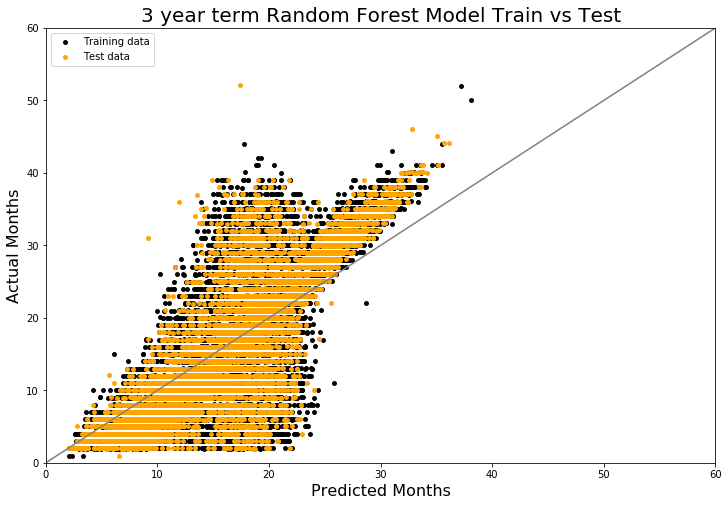

In [116]:
printMod(x_train,x_test,y_train,y_test,model,"3 year term Random Forest")

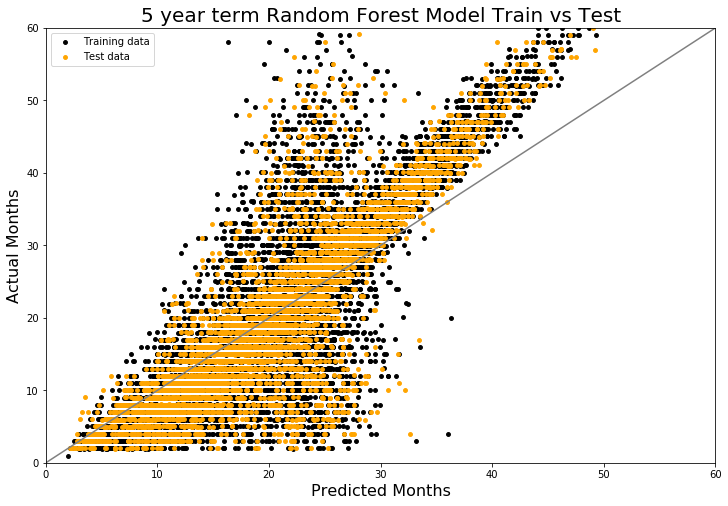

In [118]:
printMod(x_tr,x_te,y_tr,y_te,model60,"5 year term Random Forest")

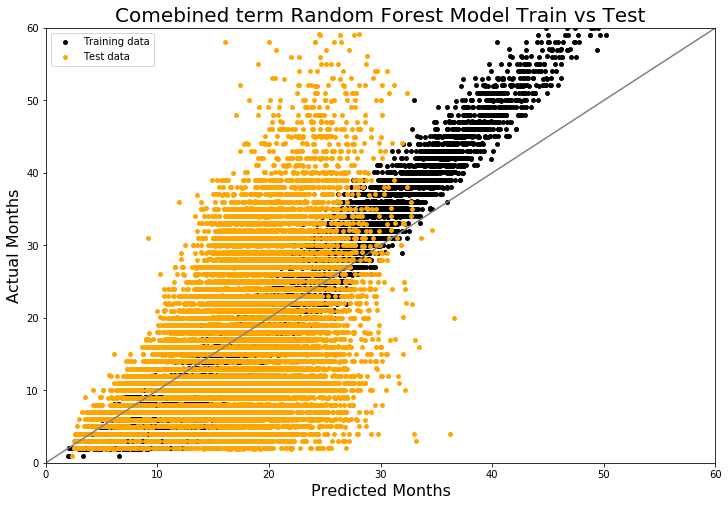

In [129]:
printMod(x_trCom,x_teCom,y_trCom,y_teCom,modCom,"Comebined term Random Forest")

In [102]:
grid_pred_com

array([21.08094439, 16.30005165, 18.60596005, ..., 24.4114081 ,
       18.89506492, 20.91398966])

#### 36 month term

In [132]:
# Random Forest Feature Importance 
# Get numerical feature importances
feats_rf = list(model.feature_importances_)

# List of tuples with variable and importance
feats_rf_score = [(feature, round(importance, 5)) for feature, importance in zip(x_train.columns, feats_rf)]

# Sort the feature importances by most important first
sorted_feats_rf_score = sorted(feats_rf_score, key = lambda x: x[1], reverse = True )

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in sorted_feats_rf_score]

Variable: treasury_rate        Importance: 0.16826
Variable: credit_hist          Importance: 0.04427
Variable: revol_util           Importance: 0.04369
Variable: dti                  Importance: 0.04347
Variable: unemp_rate_3mon      Importance: 0.03971
Variable: active_rev_acct_frac Importance: 0.03687
Variable: annual_inc           Importance: 0.03599
Variable: total_bc_limit       Importance: 0.03547
Variable: funded_amnt          Importance: 0.03469
Variable: total_rev_hi_lim     Importance: 0.03208
Variable: int_rate             Importance: 0.02984
Variable: total_il_high_credit_limit Importance: 0.0288
Variable: addr_state           Importance: 0.02869
Variable: tot_cur_bal          Importance: 0.02627
Variable: tot_hi_cred_lim      Importance: 0.02617
Variable: total_acc            Importance: 0.02531
Variable: mo_sin_rcnt_tl       Importance: 0.02482
Variable: fico_score           Importance: 0.02482
Variable: open_acc             Importance: 0.02242
Variable: num_rev_accts   

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [128]:
rf_feature_importances_top20 = sorted_feats_rf_score[:20]
featureNames, featureScores = zip(*list(rf_feature_importances_top20))

plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.gca().invert_yaxis()
plt.title('feature importance')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importances 30 Month Loans')

NameError: name 'sorted_feats_rf_score' is not defined

#### 60 month term

In [103]:
# Random Forest Feature Importance 
# Get numerical feature importances
feats_rf60 = list(model60.feature_importances_)

# List of tuples with variable and importance
feats_rf_score60 = [(feature, round(importance, 5)) for feature, importance in zip(x_tr.columns, feats_rf60)]

# Sort the feature importances by most important first
sorted_feats_rf_score60 = sorted(feats_rf_score60, key = lambda x: x[1], reverse = True )

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in sorted_feats_rf_score60]

Variable: inq_last_12m         Importance: 0.09821
Variable: treasury_rate        Importance: 0.08668
Variable: credit_hist          Importance: 0.04368
Variable: revol_util           Importance: 0.04145
Variable: dti                  Importance: 0.04126
Variable: unemp_rate_3mon      Importance: 0.03995
Variable: annual_inc           Importance: 0.0361
Variable: active_rev_acct_frac Importance: 0.03446
Variable: total_bc_limit       Importance: 0.03318
Variable: funded_amnt          Importance: 0.03288
Variable: int_rate             Importance: 0.03179
Variable: total_rev_hi_lim     Importance: 0.02984
Variable: addr_state           Importance: 0.02899
Variable: total_il_high_credit_limit Importance: 0.02812
Variable: term                 Importance: 0.02774
Variable: total_acc            Importance: 0.02536
Variable: tot_cur_bal          Importance: 0.02485
Variable: tot_hi_cred_lim      Importance: 0.02423
Variable: fico_score           Importance: 0.02352
Variable: mo_sin_rcnt_tl  

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 1.0, 'Feature Importances 60 month Loans')

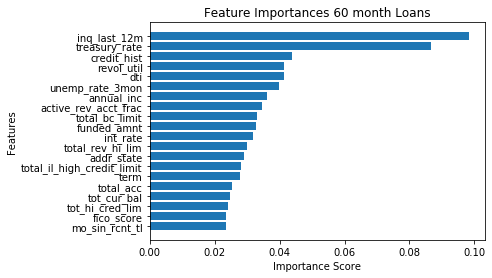

In [106]:
rf_feature_importances_top20_60 = sorted_feats_rf_score60[:20]
featureNames60, featureScores60 = zip(*list(rf_feature_importances_top20_60))

plt.barh(range(len(featureScores60)), featureScores60, tick_label=featureNames60)
plt.gca().invert_yaxis()
plt.title('feature importance')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importances 60 month Loans')

#### Save the models

In [123]:
import pickle

In [124]:
#file_36Mo = 'model_36_Mo.sav'
#pickle.dump(model,open(file_36Mo,'wb'))

In [125]:
#file_60Mo_CV = 'model_60_Mo_CV.sav'
#pickle.dump(gs_rf_60,open(file_60Mo_CV,'wb'))

In [126]:
#file_60Mo = 'model_60_Mo.sav'
#pickle.dump(model60,open(file_60Mo,'wb'))

In [127]:
#file_Combined = 'model_Combined.sav'
#pickle.dump(modCom,open(file_Combined,'wb'))

#### Make predictions